# Section 9: Example Projects

## **TITANIC PROJECT**

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('✅ Libraries imported!')

✅ Libraries imported!


In [4]:
titanic_df = pd.read_csv('train.csv')

In [13]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
titanic_df.shape

(891, 12)

In [12]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- A lot of null values for cabin.

---

# Basic questions for EDA:

1. **Who were the passengers on the Titanic? (Ages, Gender, Class, ...)**

2. **What deck were the passengers on and how does that related to their class?**

3. **Where did the passengers come from?**

4. **Who was alone and who was with family?**

5. **What factor helped someone survuve the sinking?**


## **1. Who were the passengers?**

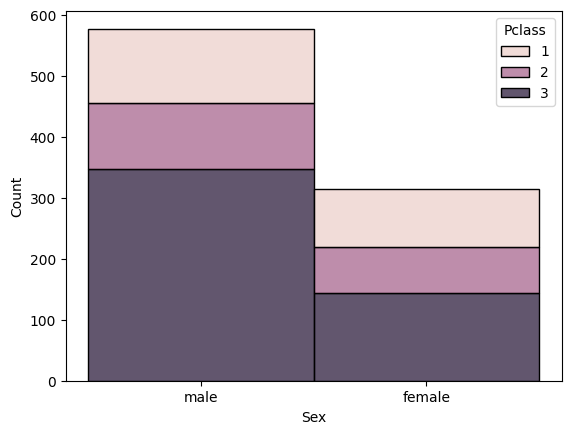

In [34]:
sns.histplot(x='Sex', data=titanic_df, hue='Pclass', multiple="stack");

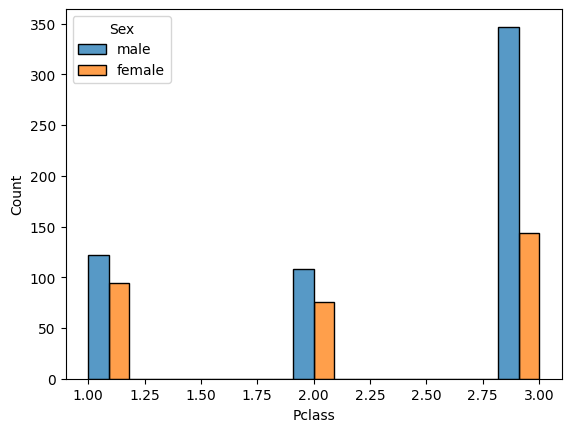

In [38]:
sns.histplot(x='Pclass', data=titanic_df, hue='Sex', multiple="dodge");

In [ ]:
# Let's create a function to explore if a passenger is male, female or a child:

def male_female_child(passenger):
    age, sex = passenger

    if age < 16:
        return 'child'
    else:
        return sex

In [40]:
# Applying the function:

titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [43]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Text(0, 0.5, 'Count')

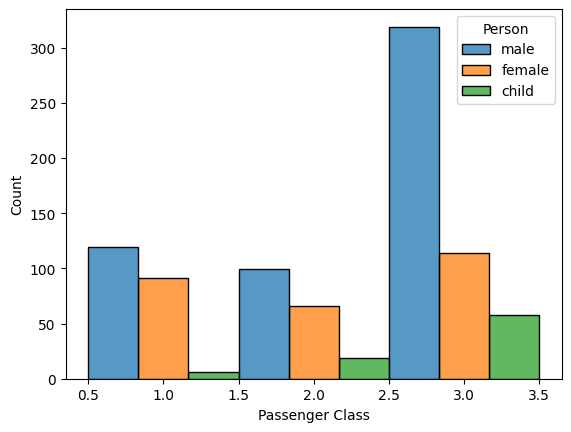

In [50]:
sns.histplot(x='Pclass', data=titanic_df, hue='Person', multiple="dodge", discrete=True);

plt.xlabel('Passenger Class')
plt.ylabel('Count')

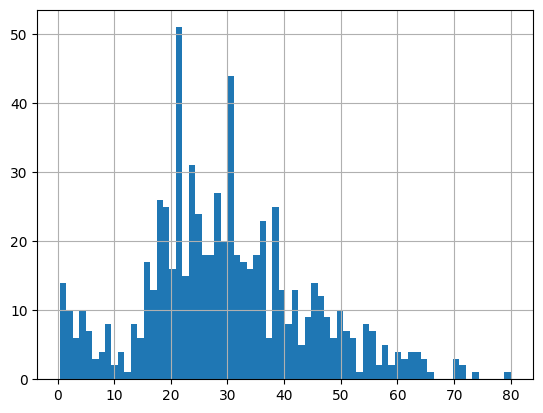

In [51]:
titanic_df['Age'].hist(bins = 70);

In [55]:
titanic_df['Age'].mean().round(1)

29.7

In [56]:
titanic_df['Person'].value_counts()

Person
male      537
female    271
child      83
Name: count, dtype: int64

### **KDE Plot**
Python data visualization tool (especially with the Seaborn library) that shows the probability density function (PDF) of continuous variables, creating a smooth curve that represents the distribution of the data, helping to understand the shape, center, and dispersion of the data.

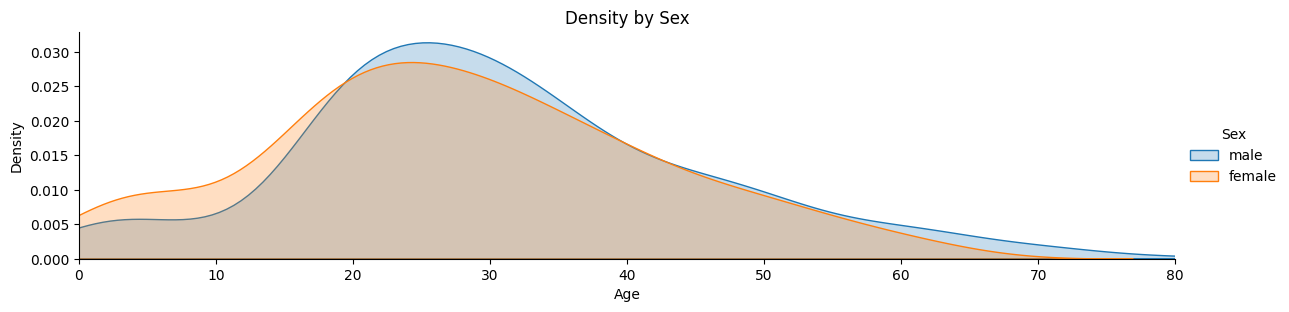

In [65]:
# FacetGrid -> multiple plots in 1 figure
fig = sns.FacetGrid( titanic_df, hue='Sex', aspect = 4 )

fig.map( sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest), title="Density by Sex")

fig.add_legend();

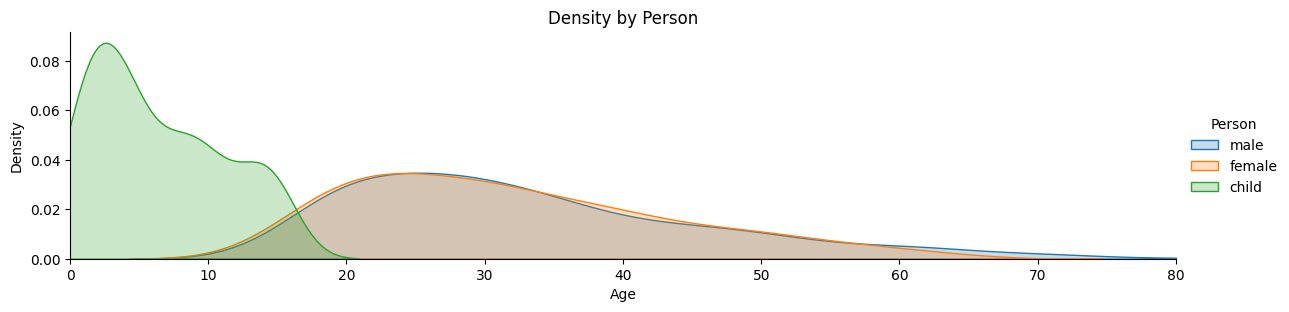

In [67]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect = 4 )

fig.map(sns.kdeplot, 'Age', fill=True);

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest), title="Density by Person")

fig.add_legend();

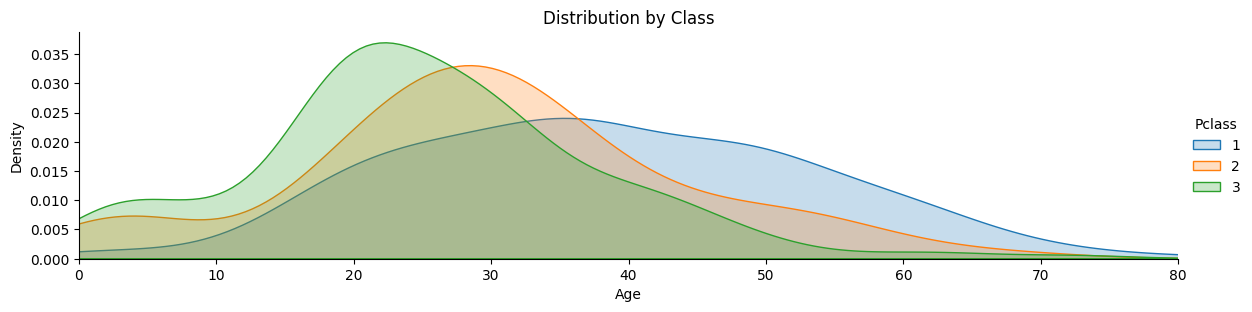

In [68]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect = 4 )

fig.map(sns.kdeplot, 'Age', fill=True);

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest), title="Distribution by Class")

fig.add_legend();

--- 


## **2. What deck were the passengers on and how does that related to their class?**

In [75]:
deck = titanic_df['Cabin'].dropna()

deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [ ]:
levels = [] #empty list

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

cabin_df.head(10)

,Cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


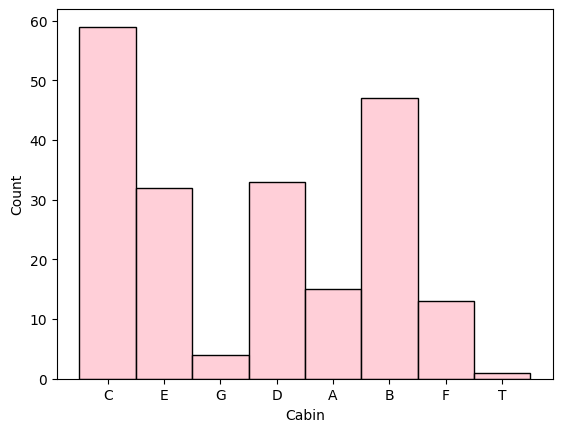

In [ ]:
# Created a DataFrame of cabins. Now let's plot it:
sns.histplot(x='Cabin', data=cabin_df, color='pink');

In [88]:
cabin_df = cabin_df[cabin_df.Cabin != 'T'] # let's drop the T cabin, as it doenst make sense.

Text(0, 0.5, 'Count')

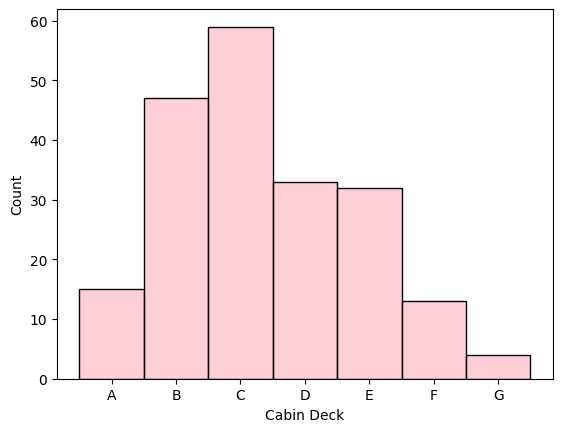

In [94]:
sns.histplot(x='Cabin', data=cabin_df.sort_values('Cabin'), color='pink')
plt.xlabel('Cabin Deck')
plt.ylabel('Count')

--- 

## **3. Where did the passengers come from?**

Text(0, 0.5, 'Count')

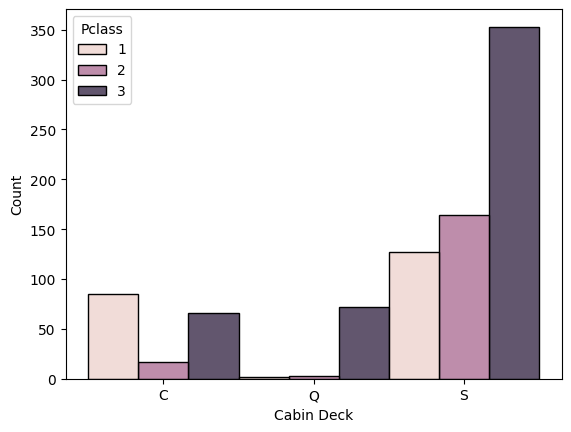

In [101]:
sns.histplot(x='Embarked', data=titanic_df.sort_values('Embarked'), hue='Pclass', multiple='dodge');
plt.xlabel('Cabin Deck')
plt.ylabel('Count')

- S = Southampton
- C = Cherbourg
- Q = Queenstown 

### **Insights**
- Most of the 3rd class people came from the Southamton port.
- Majority of people embarked in Cherbourg (C) are in 1st class.

---

## **4. Who was alone and who was with family?**

- Column **SibSp** --> siblings
- Column **Parch** --> Parents or Children

If both columns are 0, then the passenger was ALONE (i.e. no siblings, no parents and no children onboard)

In [110]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [111]:
titanic_df['Alone'].head(15)

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
11    0
12    0
13    6
14    0
Name: Alone, dtype: int64

👆 Hence, all those with 0 values here had no family, i.e. they were completely alone in the Titanic!

In [112]:
titanic_df['Alone'].loc[ titanic_df['Alone'] > 0 ] = 'With Family'

/tmp/ipykernel_9350/803036575.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df['Alone'].loc[ titanic_df['Alone'] > 0 ] = 'With Family'
/tmp/ipykernel_9350/803036575.py:1: SettingWithCopyWarning: 
A value is trying to be set on 

In [113]:
titanic_df['Alone'].loc[ titanic_df['Alone'] == 0 ] = 'Alone'

/tmp/ipykernel_9350/4060868251.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_df['Alone'].loc[ titanic_df['Alone'] == 0 ] = 'Alone'


In [114]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


Text(0.5, 1.0, 'Who was alone in the Titanic?')

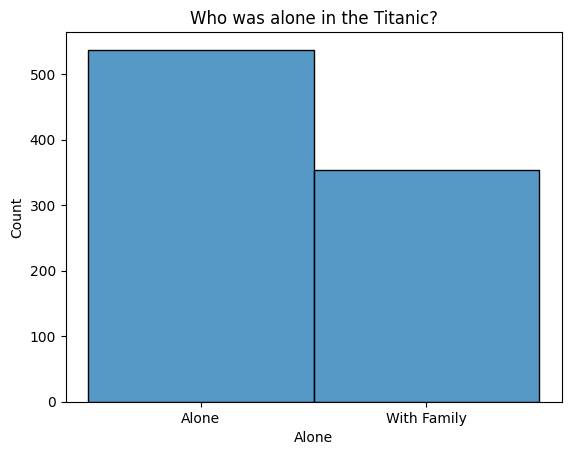

In [117]:
sns.histplot(x='Alone', data=titanic_df.sort_values('Alone'), multiple='dodge');

plt.ylabel('Count')
plt.title('Who was alone in the Titanic?')

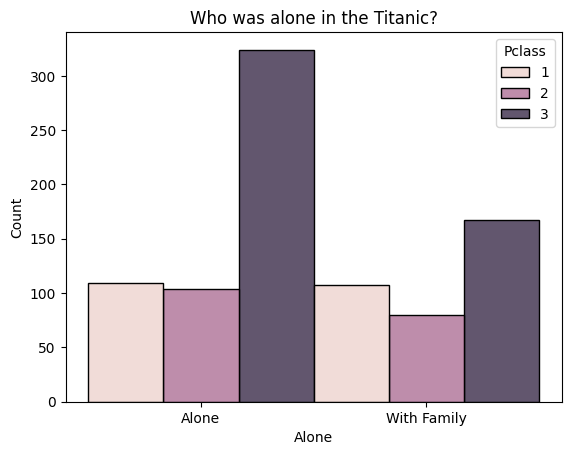

In [120]:
sns.histplot(x='Alone', data=titanic_df.sort_values('Alone'),hue='Pclass', multiple='dodge')
plt.title('Who was alone in the Titanic?')
plt.ylabel('Count');

---

## **5. What factor helped someone survuve the sinking?**

In [130]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'No', 1:'Yes'})

In [131]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Surivor,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,Yes


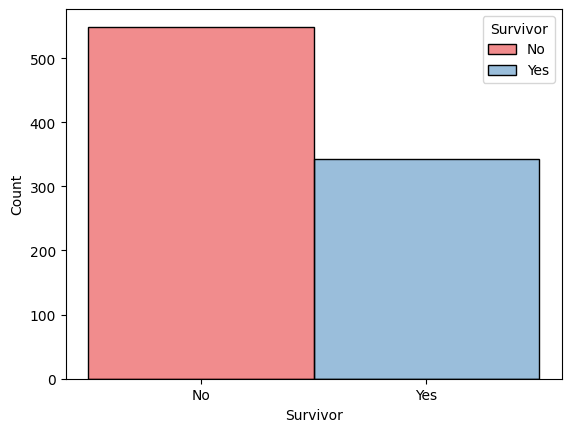

In [ ]:
sns.histplot(x='Survivor', data=titanic_df, hue='Survivor', palette='Set1');

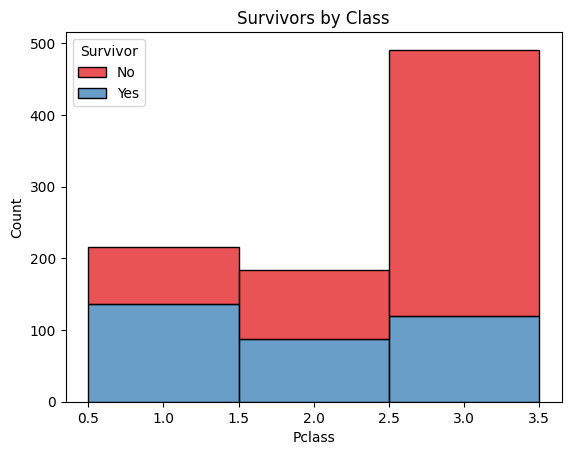

In [ ]:
sns.histplot(x='Pclass', data=titanic_df, hue='Survivor', multiple='stack', palette='Set1', discrete=True);
plt.ylabel('Count')
plt.title('Survivors by Class');

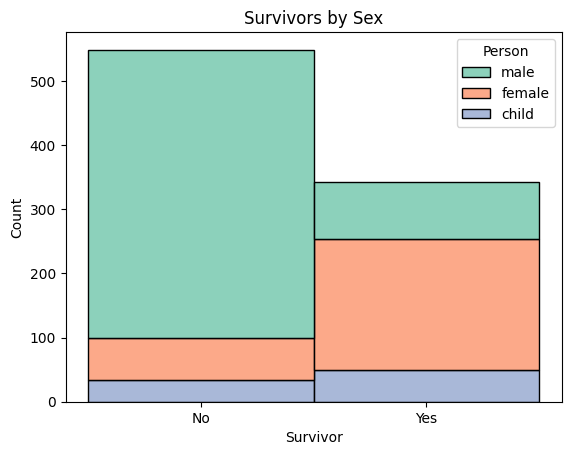

In [ ]:
sns.histplot(x='Survivor', data=titanic_df, hue='Person', multiple='stack', palette='Set2', discrete=True)
plt.ylabel('Count')
plt.title('Survivors by Sex');

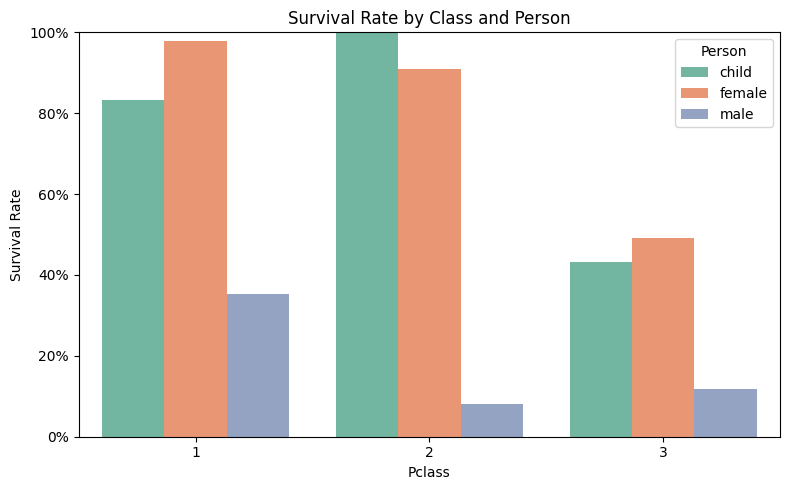

In [167]:
# ensure numeric survival column exists (0/1)
titanic_df['surv_num'] = titanic_df['Survived']  # if already 0/1
# or if you mapped to 'Yes'/'No': titanic_df['surv_num'] = titanic_df['Survivor'].map({'No':0,'Yes':1})

grouped = titanic_df.groupby(['Pclass','Person'])['surv_num'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='surv_num', hue='Person', data=grouped, palette='Set2')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Survival Rate by Class and Person')
plt.tight_layout()

👆 Shows proportions (as percentages) rather than counts!

### **Conclusions**

- if female or a child in the 1st or 2st class, chances of survival are very high
- if a male in the 3rd class, chances of survival are very low.

### Extra -  Did having a family member increase the odds of surviving?

In [ ]:
# ensure numeric survival column exists (0/1)
titanic_df['surv_num'] = titanic_df['Survived']  # if already 0/1
# or if you mapped to 'Yes'/'No': titanic_df['surv_num'] = titanic_df['Survivor'].map({'No':0,'Yes':1})

grouped = titanic_df.groupby(['Pclass','Person'])['surv_num'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='surv_num', hue='Person', data=grouped, palette='Set2')
plt.ylabel('Survival Rate')
plt.ylim(0,1)
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Survival Rate by Class and Person')
plt.tight_layout()

In [180]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Surivor,Survivor,Pclass_str,xpos,surv_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,No,Class 3,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,Yes,Class 1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,Yes,Class 3,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes,Yes,Class 1,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,No,Class 3,3,0


In [189]:
alone_df = titanic_df.groupby(['Pclass','Alone'])['Survived'].mean().reset_index()
alone_df

,Pclass,Alone,Survived
0,1,Alone,0.532110
1,1,With Family,0.728972
2,2,Alone,0.346154
3,2,With Family,0.637500
4,3,Alone,0.212963
5,3,With Family,0.299401


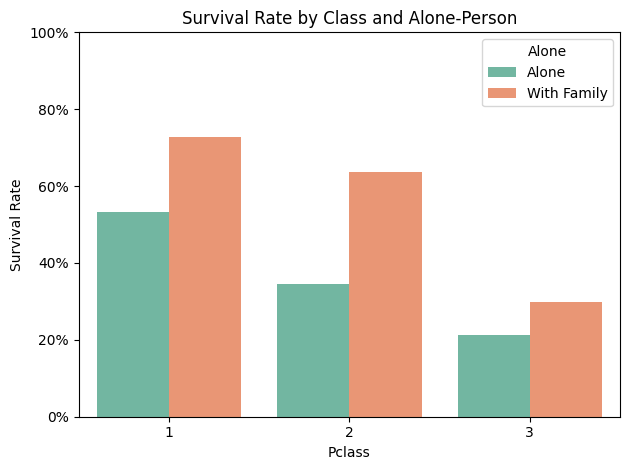

In [195]:
sns.barplot(x='Pclass', y='Survived', hue='Alone', data=alone_df, palette='Set2')
plt.ylabel('Survival Rate')
plt.ylim(0,1)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Survival Rate by Class and Alone-Person')
plt.tight_layout()

plt.show();

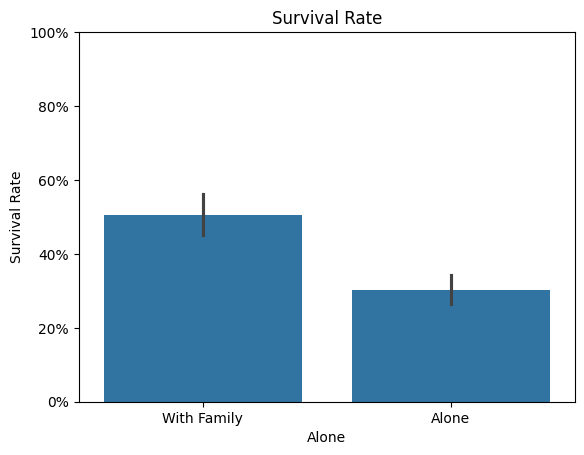

In [ ]:
# Now, independent of class:

sns.barplot(x='Alone', y='Survived', data=titanic_df)
plt.ylabel('Survival Rate')
plt.ylim(0,1)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Survival Rate')
plt.show();